<h1>Load Prerequisite Libraries

In [47]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp

<h1>Load The Data

In [48]:
df = pd.read_csv('Data/RealUKAccidentAnalysisData/dftRoadSafetyData_Accidents_2018.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h1>Examine The Data</h1>

In [ ]:
df.head

In [50]:
df.shape

(122635, 32)

In [51]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

<h3>1. List down the Categorical Attributes

In [52]:
df.nunique(axis=0)

Accident_Index                                 122635
Location_Easting_OSGR                           85434
Location_Northing_OSGR                          86863
Longitude                                      117984
Latitude                                       116696
Police_Force                                       51
Accident_Severity                                   3
Number_of_Vehicles                                 15
Number_of_Casualties                               18
Date                                              365
Day_of_Week                                         7
Time                                             1438
Local_Authority_(District)                        380
Local_Authority_(Highway)                         207
1st_Road_Class                                      6
1st_Road_Number                                  3675
Road_Type                                           6
Speed_limit                                         6
Junction_Detail             

In [53]:
df.Accident_Severity.unique()

array([3, 2, 1])

In [54]:
df.Police_Force.unique()

array([ 1, 48,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22,
       23, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47,
       50, 52, 53, 54, 55, 60, 61, 62, 63, 91, 92, 93, 94, 95, 96, 97, 98])

In [55]:
df.Number_of_Vehicles.unique()

array([ 2,  1,  3,  4,  6,  8,  5,  7,  9, 13, 10, 16, 11, 24, 18])

In [56]:
df.Number_of_Casualties.unique()

array([ 2,  1,  4,  7,  3,  6,  5, 12,  9,  8, 10, 13, 11, 59, 20, 23, 17,
       29])

In [57]:
df.Day_of_Week.unique()

array([2, 3, 4, 5, 6, 7, 1])

In [58]:
df.Time.unique()

array(['01:30', '00:50', '00:45', ..., '04:39', '04:59', '04:31'],
      dtype=object)

In [59]:
df['Local_Authority_(District)'].unique()

array([  2,  17,   3,   6,  30,  12,   7,  28,   5,  25,  29,   8,   9,
        27,  10,   4,  31,  24,  32,  21,  13,  14,  11,  16,  22,  20,
        26,  15,  19,   1,  18,  23,  57, 570,  62,  60,  65,  61,  64,
        63,  71,  70,  75,  80,  83,  72,  82,  77,  79,  73,  84,  74,
        76,  85,  90,  91,  95,  93,  92, 102, 107, 110, 109, 100, 114,
       112, 101, 106, 104, 128, 129, 130, 124, 147, 139, 148, 149, 150,
       146, 169, 161, 187, 182, 181, 189, 180, 184, 186, 185, 206, 204,
       200, 203, 202, 215, 210, 211, 213, 228, 233, 231, 232, 240, 241,
       243, 245, 305, 302, 300, 307, 303, 309, 306, 256, 255, 254, 258,
       252, 251, 253, 250, 257, 273, 286, 276, 285, 284, 277, 274, 270,
       278, 290, 291, 294, 293, 292, 327, 323, 324, 328, 325, 320, 322,
       321, 329, 340, 344, 345, 341, 346, 342, 343, 347, 351, 355, 350,
       353, 356, 352, 354, 364, 362, 367, 366, 368, 363, 361, 360, 365,
       380, 382, 383, 381, 385, 386, 384, 393, 395, 390, 391, 39

In [60]:
df['Local_Authority_(Highway)'].unique()

array(['E09000007', 'E09000025', 'E09000019', 'E09000011', 'E09000003',
       'E09000020', 'E09000023', 'E09000005', 'E09000030', 'E09000018',
       'E09000015', 'E09000028', 'E09000022', 'E09000009', 'E09000032',
       'E09000012', 'E09000014', 'E09000027', 'E09000010', 'E09000029',
       'E09000031', 'E09000026', 'E09000013', 'E09000002', 'E09000024',
       'E09000008', 'E09000017', 'E09000016', 'E09000006', 'E09000033',
       'E09000004', 'E09000021', 'EHEATHROW', 'E09000001', 'E10000006',
       'E06000009', 'E06000008', 'E10000017', 'E08000011', 'E08000012',
       'E08000015', 'E08000014', 'E08000013', 'E08000003', 'E08000006',
       'E08000008', 'E08000007', 'E08000001', 'E08000010', 'E08000009',
       'E08000002', 'E08000005', 'E08000004', 'E06000007', 'E06000049',
       'E06000050', 'E06000006', 'E08000021', 'E06000048', 'E08000022',
       'E08000023', 'E08000024', 'E08000020', 'E06000047', 'E06000005',
       'E10000023', 'E06000014', 'E08000036', 'E08000035', 'E080

In [61]:
df['1st_Road_Class'].unique()

array([3, 4, 5, 6, 1, 2])

In [62]:
df['1st_Road_Number'].unique()

array([ 501,  165,    1, ...,  783, 7020, 7068])

In [63]:
df.Road_Type.unique()

array([3, 6, 2, 1, 9, 7])

In [64]:
df.Speed_limit.unique()

array([30, 20, 40, 50, 70, 60])

In [65]:
df.Junction_Detail.unique()

array([ 0,  2,  6,  7,  5,  3,  9,  1,  8, -1])

In [66]:
df.Junction_Control.unique()

array([-1,  4,  2,  1,  3])

In [67]:
df['2nd_Road_Class'].unique()

array([-1,  6,  5,  3,  4,  1,  2])

In [68]:
df['2nd_Road_Number'].unique()

array([   0,  124,   20, ...,  781,  709, 7068])

In [69]:
df['Pedestrian_Crossing-Human_Control'].unique()

array([ 0, -1,  2,  1])

In [70]:
df['Pedestrian_Crossing-Physical_Facilities'].unique()

array([ 0,  5,  8,  4,  1,  7, -1])

In [71]:
df.Light_Conditions.unique()

array([4, 7, 1, 6, 5])

In [72]:
df.Weather_Conditions.unique()

array([ 1,  2,  5,  9,  4,  8,  6,  3,  7, -1])

In [73]:
df.Road_Surface_Conditions.unique()

array([ 1,  2, -1,  4,  5,  3])

In [74]:
df.Special_Conditions_at_Site.unique()

array([ 0,  3, -1,  1,  4,  5,  6,  2,  7])

In [75]:
df.Carriageway_Hazards.unique()

array([ 0,  3, -1,  2,  1,  7,  6])

In [76]:
df.Urban_or_Rural_Area.unique()

array([ 1,  2,  3, -1])

In [77]:
df.Did_Police_Officer_Attend_Scene_of_Accident.unique()

array([ 1,  2,  3, -1])

In [78]:
df.LSOA_of_Accident_Location.unique()

array(['E01000854', 'E01003531', 'E01002723', ..., 'W01001907',
       'W01000485', 'W01000456'], dtype=object)

<h3>2. Data Types</h3>
<h5>A. List out the Data Types</h5>

In [79]:
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

<h5>B. Select Only Selected Data Types</h5>

In [80]:
#To show only Numbers
df.select_dtypes(include=['number'])

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,2,2,...,0,0,0,4,1,1,0,0,1,1
1,542020.0,184290.0,0.046471,51.539651,1,3,1,1,2,17,...,0,0,0,4,1,1,0,0,1,1
2,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,2,3,...,0,0,5,4,1,1,0,0,1,1
3,541450.0,183220.0,0.037828,51.530179,1,2,2,1,2,17,...,124,0,5,4,2,2,0,0,1,1
4,543580.0,176500.0,0.065781,51.469258,1,2,2,2,2,6,...,0,0,0,4,1,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122630,307124.0,594145.0,-3.461918,55.232746,98,3,2,1,1,917,...,0,0,0,1,1,2,0,0,2,1
122631,313325.0,581065.0,-3.360440,55.116374,98,3,2,1,2,917,...,0,0,0,1,1,1,0,0,1,1
122632,319337.0,574511.0,-3.264352,55.058510,98,3,3,1,5,917,...,0,0,0,4,1,2,0,0,2,1
122633,318858.0,566932.0,-3.269695,54.990344,98,2,1,1,2,917,...,552,0,0,1,1,4,0,0,2,1


In [81]:
#To show only Objects
df.select_dtypes(include=['object'])

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,2018010080971,01/01/2018,01:30,E09000007,E01000854
1,2018010080973,01/01/2018,00:50,E09000025,E01003531
2,2018010080974,01/01/2018,00:45,E09000019,E01002723
3,2018010080981,01/01/2018,03:00,E09000025,E01003492
4,2018010080982,01/01/2018,02:20,E09000011,E01001682
...,...,...,...,...,...
122630,2018984115718,23/12/2018,13:45,S12000006,NaN
122631,2018984115918,24/12/2018,10:45,S12000006,NaN
122632,2018984116018,20/12/2018,18:00,S12000006,NaN
122633,2018984116318,24/12/2018,11:50,S12000006,NaN


In [82]:
#To show only integers
df.select_dtypes(include=['int'])

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,1,3,2,2,2,2,3,501,3,30,...,0,0,0,4,1,1,0,0,1,1
1,1,3,1,1,2,17,4,165,6,30,...,0,0,0,4,1,1,0,0,1,1
2,1,3,2,1,2,3,3,1,6,20,...,0,0,5,4,1,1,0,0,1,1
3,1,2,2,1,2,17,4,167,3,30,...,124,0,5,4,2,2,0,0,1,1
4,1,2,2,2,2,6,3,207,6,30,...,0,0,0,4,1,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122630,98,3,2,1,1,917,3,701,6,60,...,0,0,0,1,1,2,0,0,2,1
122631,98,3,2,1,2,917,2,74,3,70,...,0,0,0,1,1,1,0,0,1,1
122632,98,3,3,1,5,917,4,7076,6,30,...,0,0,0,4,1,2,0,0,2,1
122633,98,2,1,1,2,917,5,50,6,60,...,552,0,0,1,1,4,0,0,2,1


In [83]:
#To show only booleans
df.select_dtypes(include=['boolean'])

""
0
1
2
3
4
...
122630
122631
122632
122633


In [84]:
#To show only float64
df.select_dtypes(include=['float64'])

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude
0,529150.0,182270.0,-0.139737,51.524587
1,542020.0,184290.0,0.046471,51.539651
2,531720.0,182910.0,-0.102474,51.529746
3,541450.0,183220.0,0.037828,51.530179
4,543580.0,176500.0,0.065781,51.469258
...,...,...,...,...
122630,307124.0,594145.0,-3.461918,55.232746
122631,313325.0,581065.0,-3.360440,55.116374
122632,319337.0,574511.0,-3.264352,55.058510
122633,318858.0,566932.0,-3.269695,54.990344


<h3>3. Get the statistics according to Data Distribution</h3>
<h5>A. Get the statistics according to each of the group</h5>

In [85]:
df.groupby('Accident_Severity').describe()

Location_Easting_OSGR                               \
                                  count           mean           std   
Accident_Severity                                                      
1                                1670.0  424985.656886  96425.514452   
2                               23154.0  448305.932884  95999.518171   
3                               97756.0  452567.121271  94857.500729   

                                                                      \
                        min        25%       50%       75%       max   
Accident_Severity                                                      
1                  146943.0  360237.75  428844.0  500832.5  652392.0   
2                  111851.0  385114.00  453576.0  527420.0  655235.0   
3                   84654.0  388009.25  459164.5  529430.0  655275.0   

                  Location_Northing_OSGR                 ...  \
                                   count           mean  ...   
Accident_Severity                                        ...   
1                                 1670.0  320541.679042  ...   
2                                23154.0  290500.524747  ...   
3                                97756.0  280309.738635  ...   

                  Urban_or_Rural_Area       \
                                  75%  max   
Accident_Severity                            
1                                 2.0  3.0   
2                                 2.0  3.0   
3                                 2.0  3.0   

                  Did_Police_Officer_Attend_Scene_of_Accident            \
                                                        count      mean   
Accident_Severity                                                         
1                                                      1671.0  1.089168   
2                                                     23165.0  1.173840   
3                                                     97799.0  1.325842   

                                                      
                        std  min  25%  50%  75%  max  
Accident_Severity                                     
1                  0.285072  1.0  1.0  1.0  1.0  2.0  
2                  0.385082 -1.0  1.0  1.0  1.0  3.0  
3                  0.487826 -1.0  1.0  1.0  2.0  3.0  

[3 rows x 208 columns]

<h5>B. You can also examine each group for each of the attributes</h5>

In [86]:
df.groupby('Accident_Severity').Number_of_Casualties.describe()

,count,mean,std,min,25%,50%,75%,max
Accident_Severity,,,,,,,,
1,1671.0,1.678037,1.301492,1.0,1.0,1.0,2.0,20.0
2,23165.0,1.387481,0.974152,1.0,1.0,1.0,1.0,59.0
3,97799.0,1.284798,0.687646,1.0,1.0,1.0,1.0,23.0


In [87]:
df.groupby('Accident_Severity').Road_Type.describe()

,count,mean,std,min,25%,50%,75%,max
Accident_Severity,,,,,,,,
1,1671.0,5.263914,1.413497,1.0,6.0,6.0,6.0,9.0
2,23165.0,5.298338,1.539403,1.0,6.0,6.0,6.0,9.0
3,97799.0,5.145390,1.749998,1.0,3.0,6.0,6.0,9.0


In [88]:
df.groupby('Accident_Severity').Weather_Conditions.describe()

,count,mean,std,min,25%,50%,75%,max
Accident_Severity,,,,,,,,
1,1671.0,1.529623,1.552723,1.0,1.0,1.0,1.0,9.0
2,23165.0,1.499331,1.560295,-1.0,1.0,1.0,1.0,9.0
3,97799.0,1.646346,1.833214,-1.0,1.0,1.0,1.0,9.0


In [89]:
df.groupby('Accident_Severity').Light_Conditions.describe()

,count,mean,std,min,25%,50%,75%,max
Accident_Severity,,,,,,,,
1,1671.0,2.669060,2.083581,1.0,1.0,1.0,4.0,7.0
2,23165.0,2.111375,1.765631,1.0,1.0,1.0,4.0,7.0
3,97799.0,1.967229,1.674968,1.0,1.0,1.0,4.0,7.0


<h1> Data Cleaning </h1>
<h3>1. Removing the redundant variables</h3>

In [114]:
df_cleaned=df.copy().drop(['Location_Easting_OSGR','Location_Northing_OSGR','Local_Authority_(District)'],axis=1)


<h3>2. Attribute Selection</h3>

<h3>3. Removing Outliers</h3>

<h3>4. Removing Rows with Null Values</h3>

In [ ]:
df[df.Longitude.isnull()]

In [ ]:
df[df.isnull().any(axis=1)]

In [ ]:
mask= False
for col in df_cleaned.copy().drop(['Date'],axis=1).columns:
        mask = mask | df[col].isnull()
df_nulls = df[mask]
df_nulls

In [134]:
df_cleaned=df_cleaned.dropna(subset=['Accident_Index', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       'Time', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],axis=0)

(116181, 29)

<h3>5. Removing Duplicate rows</h3>

In [187]:
df_cleaned=df_cleaned[~df_cleaned.duplicated(subset=['Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],keep='last')]

In [188]:
df_cleaned.nunique(axis=0)

Accident_Index                                 116175
Longitude                                      111657
Latitude                                       110374
Police_Force                                       43
Accident_Severity                                   3
Number_of_Vehicles                                 14
Number_of_Casualties                               17
Date                                              365
Day_of_Week                                         7
Time                                             1438
Local_Authority_(Highway)                         175
1st_Road_Class                                      6
1st_Road_Number                                  3381
Road_Type                                           6
Speed_limit                                         6
Junction_Detail                                    10
Junction_Control                                    5
2nd_Road_Class                                      7
2nd_Road_Number             

<h3>6. Divide the Data for Distribution (Group By)</h3>

<h5>A. Group the data according to its severity level(Accident_Severity)</h5>

In [189]:
severity_1=df_cleaned.groupby('Accident_Severity').get_group(1)
severity_2=df_cleaned.groupby('Accident_Severity').get_group(2)
severity_3=df_cleaned.groupby('Accident_Severity').get_group(3)

<h1>Building Data Profile Tables & Plots.
Exploring the relationships in the data</h1>
<h3>1. Distribution Plot </h3>

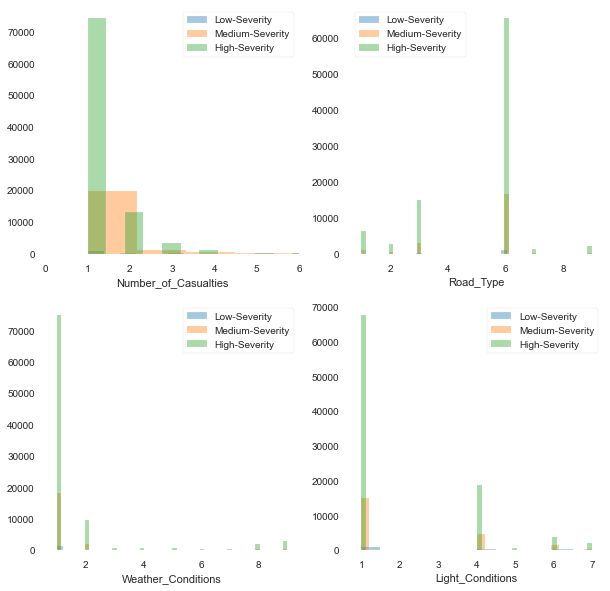

In [190]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(a=severity_1['Number_of_Casualties'], label="Low-Severity", kde=False)
sns.distplot(a=severity_2['Number_of_Casualties'], label="Medium-Severity", kde=False)
sns.distplot(a=severity_3['Number_of_Casualties'], label="High-Severity", kde=False)
plt.xlim(0,6)
plt.legend()

plt.subplot(2,2,2)
sns.distplot(a=severity_1['Road_Type'], label="Low-Severity", kde=False)
sns.distplot(a=severity_2['Road_Type'], label="Medium-Severity", kde=False)
sns.distplot(a=severity_3['Road_Type'], label="High-Severity", kde=False)
plt.legend()

plt.subplot(2,2,3)
sns.distplot(a=severity_1['Weather_Conditions'], label="Low-Severity", kde=False)
sns.distplot(a=severity_2['Weather_Conditions'], label="Medium-Severity", kde=False)
sns.distplot(a=severity_3['Weather_Conditions'], label="High-Severity", kde=False)
plt.legend()

plt.subplot(2,2,4)
sns.distplot(a=severity_1['Light_Conditions'], label="Low-Severity", kde=False)
sns.distplot(a=severity_2['Light_Conditions'], label="Medium-Severity", kde=False)
sns.distplot(a=severity_3['Light_Conditions'], label="High-Severity", kde=False)
plt.legend()


plt.show()

<h3>2. Histogram</h3>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13dc805d0>,
      dtype=object)

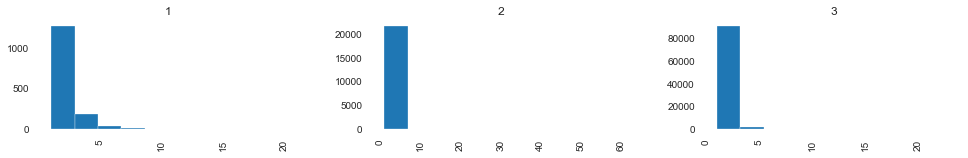

In [191]:
df_cleaned['Number_of_Casualties'].hist(by=df_cleaned['Accident_Severity'], layout=(1,3), figsize=(16,2))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13dc80990>,
      dtype=object)

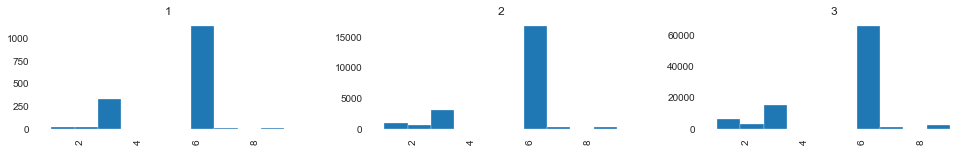

In [192]:
df_cleaned['Road_Type'].hist(by=df_cleaned['Accident_Severity'], layout=(1,3), figsize=(16,2))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x17fddb190>,
      dtype=object)

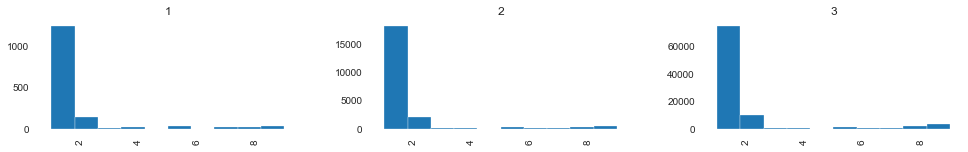

In [193]:
df_cleaned['Weather_Conditions'].hist(by=df_cleaned['Accident_Severity'], layout=(1,3), figsize=(16,2))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x17faab910>,
      dtype=object)

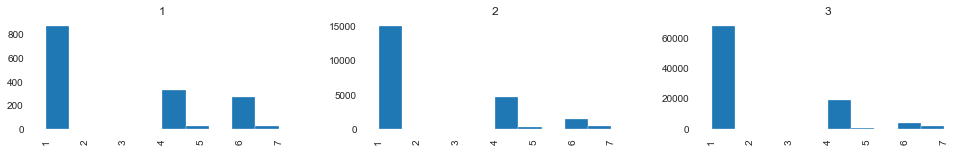

In [194]:
df_cleaned['Light_Conditions'].hist(by=df_cleaned['Accident_Severity'], layout=(1,3), figsize=(16,2))

<h3>3. Box Plot</h3>

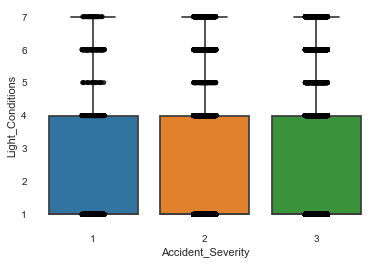

In [195]:
sns.boxplot(x='Accident_Severity',y='Light_Conditions',data=df_cleaned)
sns.stripplot(x='Accident_Severity',y='Light_Conditions',data=df_cleaned,
             jitter=True,
            marker='o',
              alpha=0.8,
              color='black'
             )



<h3>4. Heat Map and Correlation Matrix</h3>


In [196]:
corr=df_cleaned.corr()
corr

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,1st_Road_Number,Road_Type,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Longitude,1.000000,-0.263808,-0.156582,0.025637,0.010367,-0.035536,0.006687,-0.016195,-0.168512,-0.024675,...,-0.057625,-0.046081,0.047364,0.016502,-0.006119,-0.055215,-0.023756,-0.014916,-0.112690,0.066355
Latitude,-0.263808,1.000000,-0.394165,-0.026559,-0.014128,0.032241,0.001399,0.043588,0.085030,0.014660,...,0.040883,0.041518,-0.026188,-0.021449,0.022705,0.041236,0.016686,-0.000740,0.030670,0.028967
Police_Force,-0.156582,-0.394165,1.000000,-0.048632,0.044214,0.049271,-0.002927,0.062286,0.034139,0.020267,...,0.013374,0.072407,-0.136817,-0.001792,-0.052917,0.083769,0.025678,0.028654,0.330631,-0.018460
Accident_Severity,0.025637,-0.026559,-0.048632,1.000000,0.064116,-0.070263,0.005341,0.015085,-0.017094,-0.032834,...,0.014422,-0.027597,0.006760,-0.052233,0.030151,-0.009673,-0.010681,-0.012046,-0.087460,0.134250
Number_of_Vehicles,0.010367,-0.014128,0.044214,0.064116,1.000000,0.222661,-0.000784,-0.131345,-0.004484,-0.072488,...,0.012940,-0.007366,-0.060027,-0.065988,-0.032182,-0.030266,-0.004110,-0.024270,0.071188,-0.044956
Number_of_Casualties,-0.035536,0.032241,0.049271,-0.070263,0.222661,1.000000,-0.003698,-0.090577,0.008137,-0.023061,...,0.002862,0.014519,-0.030500,0.023112,-0.023564,0.024204,0.012653,0.007368,0.134524,-0.099583
Day_of_Week,0.006687,0.001399,-0.002927,0.005341,-0.000784,-0.003698,1.000000,0.011715,0.000127,0.010136,...,-0.001322,-0.002213,0.003093,0.012656,0.007466,0.004203,-0.004059,-0.001165,-0.018762,0.002626
1st_Road_Class,-0.016195,0.043588,0.062286,0.015085,-0.131345,-0.090577,0.011715,1.000000,-0.196537,0.281949,...,-0.052918,0.000127,-0.111182,-0.035520,0.005580,0.001217,-0.020653,-0.005337,-0.208871,0.094640
1st_Road_Number,-0.168512,0.085030,0.034139,-0.017094,-0.004484,0.008137,0.000127,-0.196537,1.000000,0.013620,...,0.193939,0.019741,0.066639,0.004870,0.003662,0.014477,0.004259,0.001306,0.002944,-0.027317
Road_Type,-0.024675,0.014660,0.020267,-0.032834,-0.072488,-0.023061,0.010136,0.281949,0.013620,1.000000,...,-0.087141,-0.061077,-0.069101,-0.007728,0.045764,-0.032485,-0.019655,-0.016983,-0.049149,0.034122


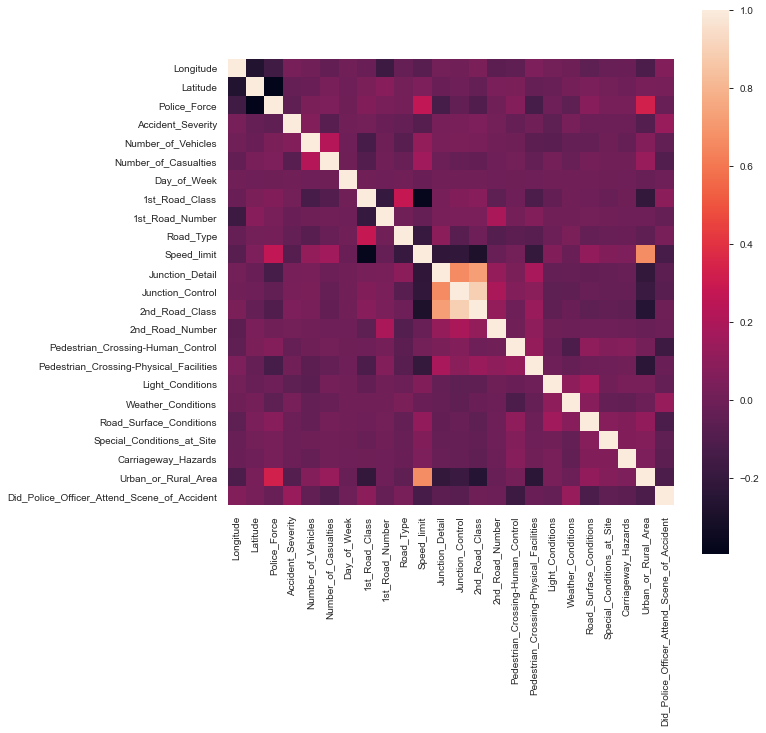

In [197]:
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,square=True)

<h3>5. Scatter Plot</h3>
<h5>A. Grid scatter plot using Seaborn</h5>

In [198]:
numerical_data=df_cleaned.select_dtypes(include=['number'])
c5=['Number_of_Casualties','Road_Type','Weather_Conditions','Light_Conditions','Urban_or_Rural_Area','Road_Surface_Conditions','Speed_limit','Day_of_Week','Accident_Severity']
numerical_data_filtered=numerical_data[c5]
numerical_data_filtered

,Number_of_Casualties,Road_Type,Weather_Conditions,Light_Conditions,Urban_or_Rural_Area,Road_Surface_Conditions,Speed_limit,Day_of_Week,Accident_Severity
0,2,3,1,4,1,1,30,2,3
1,1,6,1,4,1,1,30,2,3
2,1,6,1,4,1,1,20,2,3
3,1,3,2,4,1,2,30,2,2
4,2,6,1,4,1,2,30,2,2
...,...,...,...,...,...,...,...,...,...
116225,2,6,1,6,2,2,60,3,3
116226,1,6,1,1,2,1,30,6,3
116227,1,6,1,1,2,1,30,4,3
116228,1,6,9,4,2,2,40,2,3


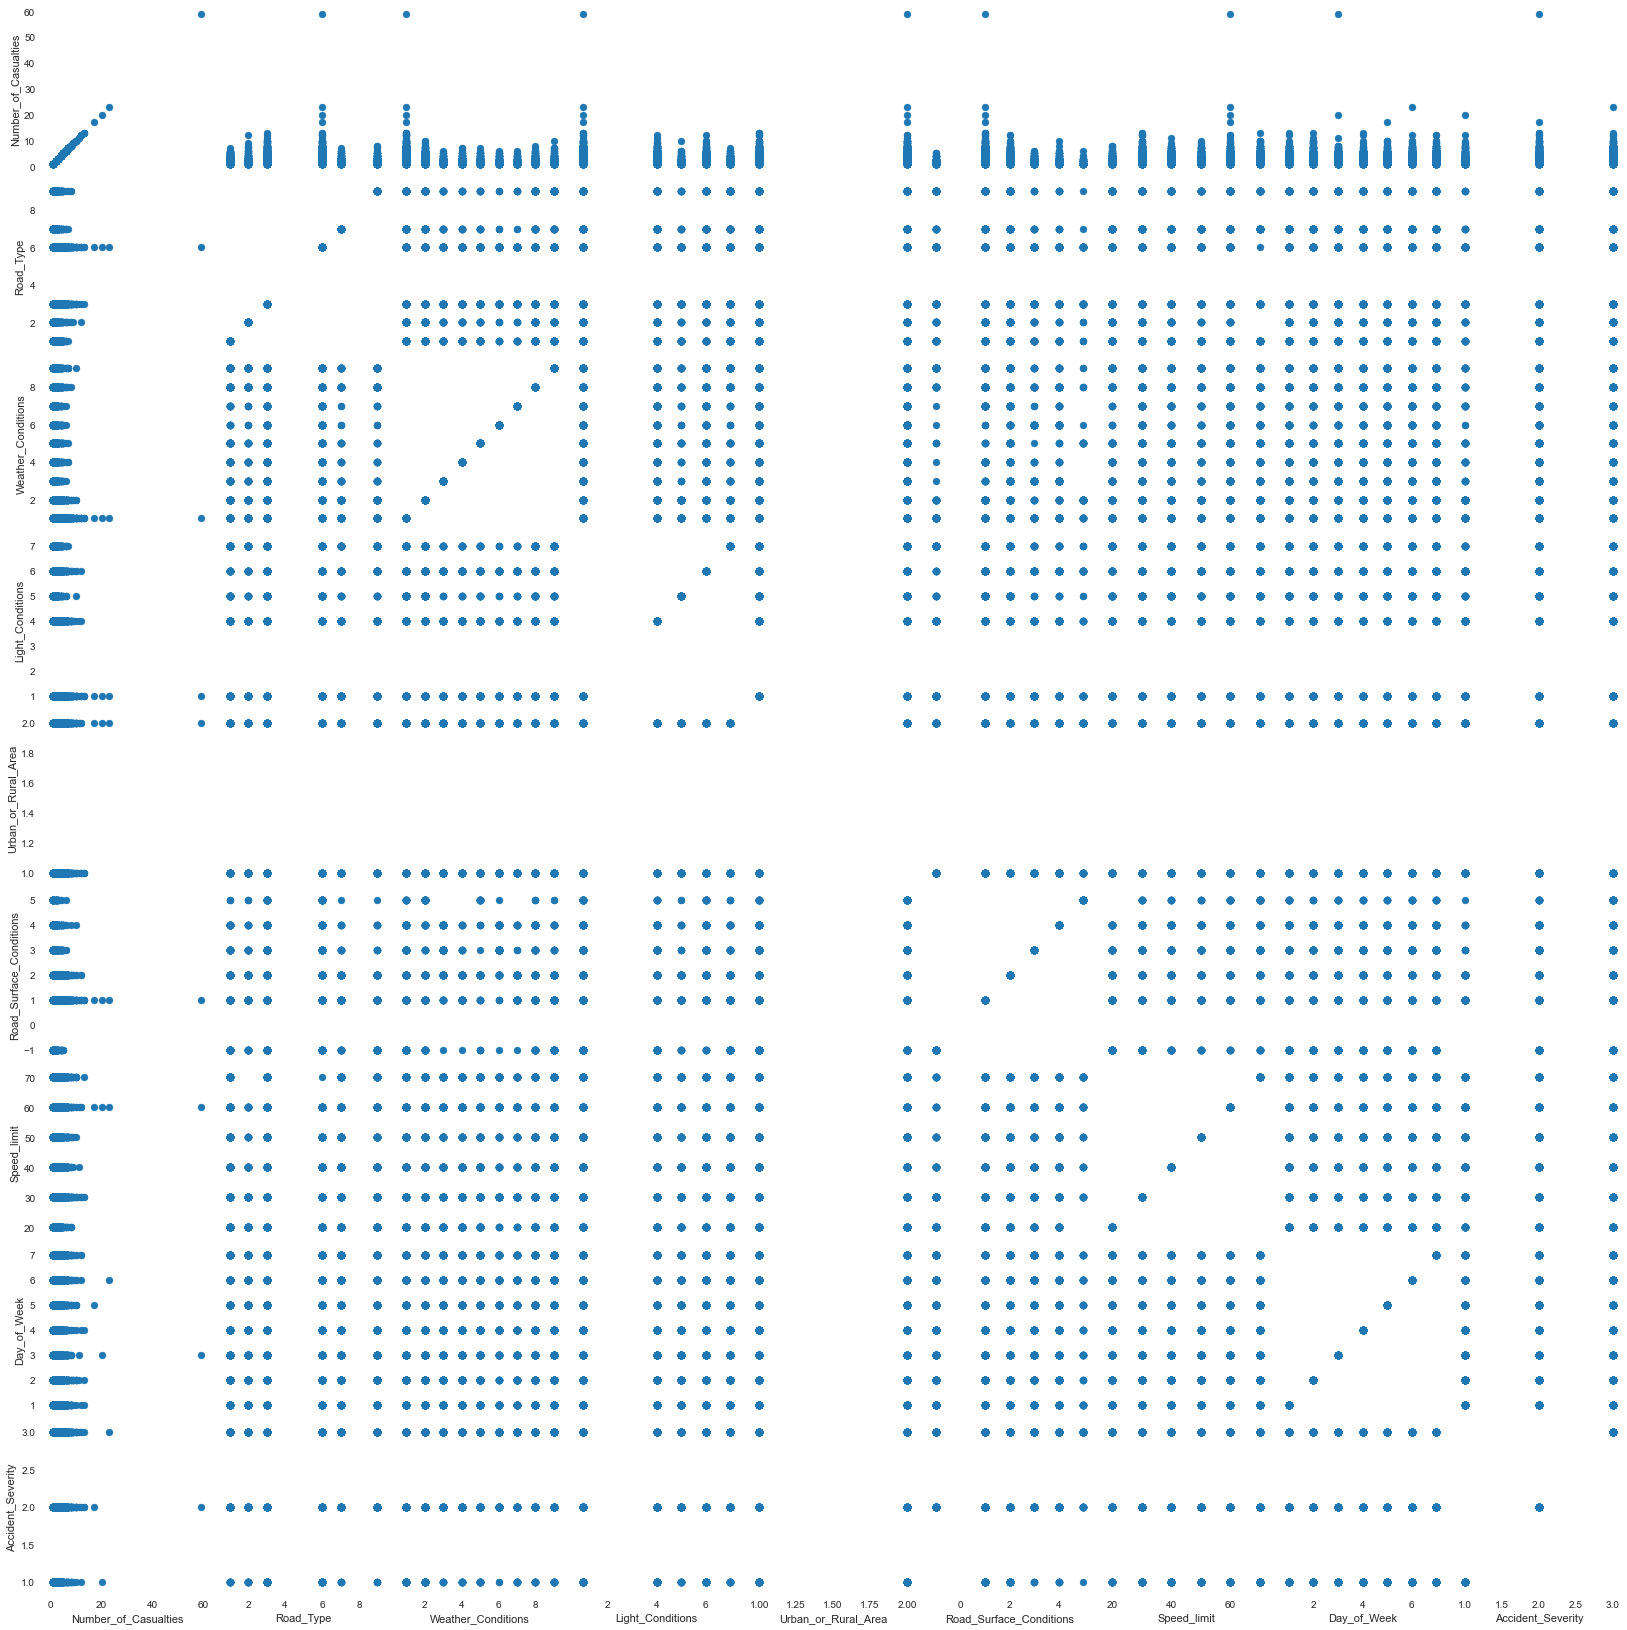

In [199]:
g=sns.PairGrid(numerical_data_filtered)
g.map(plt.scatter)

<h5>B. 3 Variable scatterplot using Seaborn</h5>

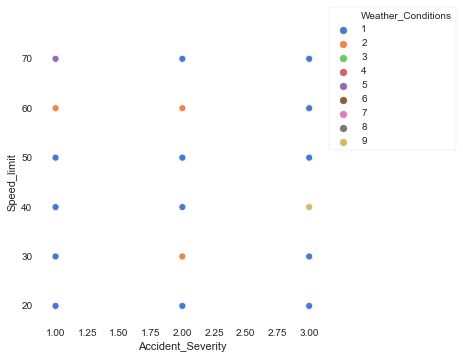

In [200]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
sns.scatterplot(x='Accident_Severity', y='Speed_limit', hue='Weather_Conditions',palette=sns.color_palette("muted",n_colors=9),data=df_cleaned)
plt.legend(loc=4,bbox_to_anchor=(1.50,0.60))
plt.show()

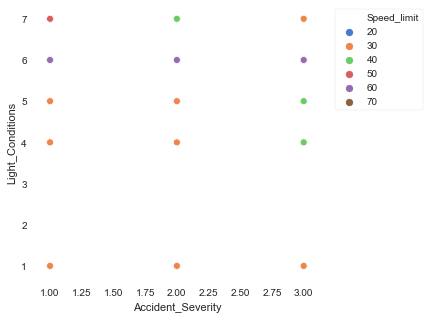

In [201]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
sns.scatterplot(x='Accident_Severity', y='Light_Conditions', hue='Speed_limit',palette=sns.color_palette("muted",n_colors=6),data=df_cleaned)
plt.legend(loc=4,bbox_to_anchor=(1.40,0.60))
plt.show()

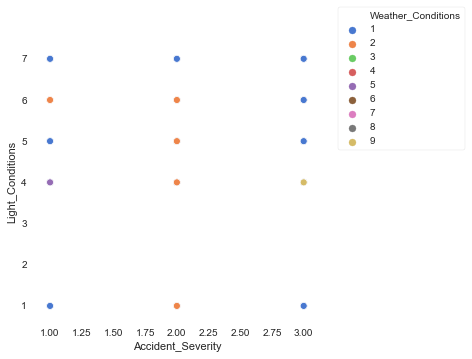

In [202]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
sns.scatterplot(x='Accident_Severity', y='Light_Conditions', hue='Weather_Conditions',palette=sns.color_palette("muted",n_colors=9),data=df_cleaned)
plt.legend(loc=4,bbox_to_anchor=(1.55,0.60))
plt.show()

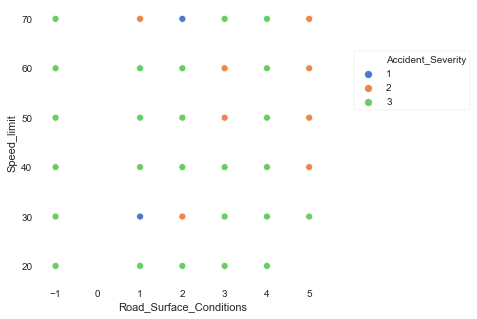

In [203]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
sns.scatterplot(x='Road_Surface_Conditions', y='Speed_limit', hue='Accident_Severity',palette=sns.color_palette("muted",n_colors=3),data=df_cleaned)
plt.legend(loc=4,bbox_to_anchor=(1.55,0.60))
plt.show()

<h3>6. Using Pandas Profiling Library </h3>


In [204]:
# Generate the Profiling Report on Uncleaned Data
profile = pp.ProfileReport(df, title="UK Accident Data-2018", explorative=True,html={'style': {'full_width': True}}, sort="None")
# The Notebook Widgets Interface
profile.to_file('Data/RealUKAccidentAnalysisData/dftRoadSafetyData_Accidents_2018.html')

In [205]:
# Generate the Profiling Report on Cleaned Data
profile = pp.ProfileReport(df_cleaned, title="UK Accident Data-2018", explorative=True,html={'style': {'full_width': True}}, sort="None")
# The Notebook Widgets Interface
profile.to_file('Data/RealUKAccidentAnalysisData/dftRoadSafetyData_Accidents_2018_cleaned.html')